# 导入库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei'] # 解决中文乱码问题
plt.rcParams['axes.unicode_minus'] = False # 解决负号无法正常显示的问题
%config InlineBackend.figure_format = 'svg' # 将图标设置成矢量图格式显示，会更清晰
plt.style.use('ggplot') # 设置绘图样式

# 导入数据

In [2]:
mc_df = pd.read_csv(open('mc_info.csv','r',encoding='utf-8'))
GDP_people_df = pd.read_csv(open('GDP_people.csv','r',encoding='utf-8'))
city_rank_df = pd.read_csv(open('city_rank.csv','r',encoding='utf-8'))

# 数据清洗
## 查看数据

In [3]:
mc_df.head()

,shop_name,city
0,安庆麦当劳华茂餐厅,安庆市
1,鞍山麦当劳五一路餐厅,鞍山市
2,鞍山麦当劳海城海洲大街餐厅,鞍山市
3,鞍山麦当劳民生路餐厅,鞍山市
4,鞍山麦当劳万达餐厅,鞍山市


In [4]:
city_rank_df.head()

,city,rank
0,北京市,一线
1,上海市,一线
2,广州市,一线
3,深圳市,一线
4,成都市,一线


In [5]:
GDP_people_df.head()

,city,GDP(亿元),people(万)
0,上海市,32679,2418
1,北京市,30320,2171
2,深圳市,24691,1253
3,广州市,23000,1450
4,重庆市,20363,3372


## 查看数据形状

In [6]:
mc_df.shape

(2332, 2)

In [7]:
GDP_people_df.shape

(97, 3)

In [8]:
city_rank_df.shape

(326, 2)

## 查看是否有缺失值

经查看，没有缺失值

In [9]:
mc_df.isnull().sum()

shop_name    0
city         0
dtype: int64

In [10]:
GDP_people_df.isnull().sum()

city         0
GDP(亿元)      0
people(万)    0
dtype: int64

In [11]:
city_rank_df.isnull().sum()

city    0
rank    0
dtype: int64

# 可视化
## 店铺数-城市（横柱状图）

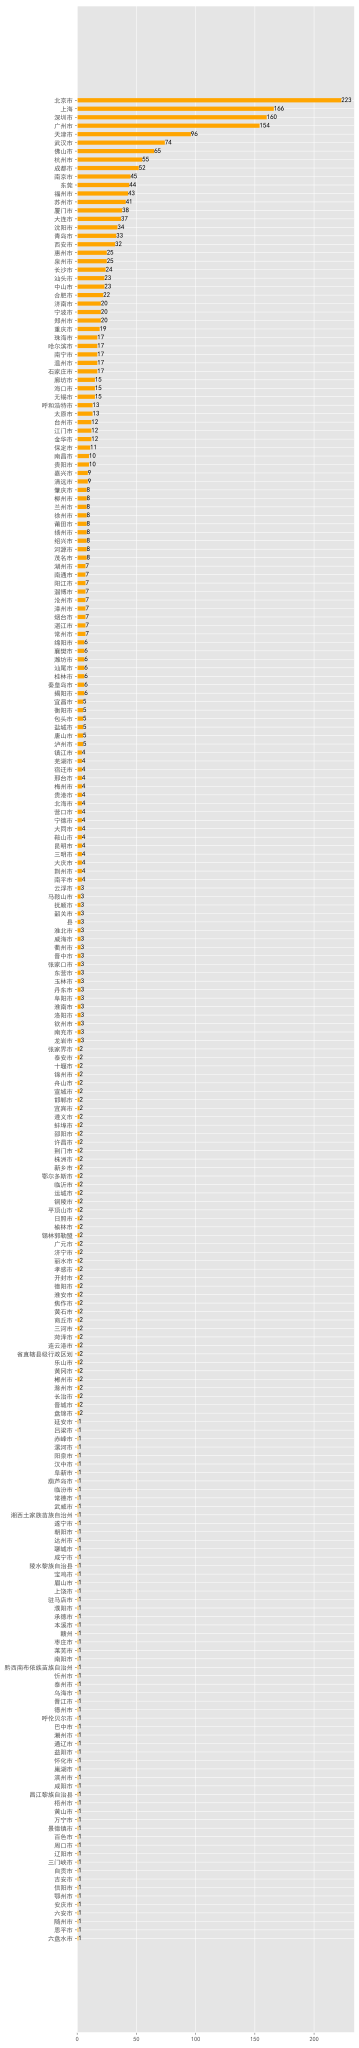

In [12]:
mc_df1 = mc_df['city'].value_counts()

# 开始建立画布，figsize 设置画布(图片)宽高
fig = plt.figure(figsize = (8,60))

# 指明 x，y
x = list(mc_df1)
x.sort()
y = list(mc_df1.index)
y = y[::-1]

# 要对所有显示数据
for a,b in zip(x,y):
    plt.text(a,b,a,ha='left',va='center',fontsize=11)

# 绘图
plt.barh(y,height=0.5,width=x,align='center',color='orange')

# 保存
plt.savefig('shop_city.png')

## 城市等级麦当劳数占比（饼状图）

计算各个等级城市的麦当劳总数

In [13]:
# 将城市等级与等级合在一起
df = pd.merge(mc_df,city_rank_df)
df.head()

,shop_name,city,rank
0,安庆麦当劳华茂餐厅,安庆市,三线
1,鞍山麦当劳五一路餐厅,鞍山市,三线
2,鞍山麦当劳海城海洲大街餐厅,鞍山市,三线
3,鞍山麦当劳民生路餐厅,鞍山市,三线
4,鞍山麦当劳万达餐厅,鞍山市,三线


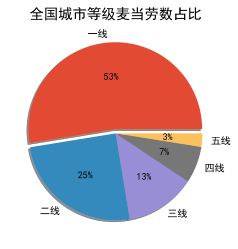

In [14]:
# 建立一个坐标系
plt.subplot(1,1,1)

# 指明 x 值
x = df['rank'].value_counts()

labels = ['一线','二线','三线','四线','五线']
explode = [0.05,0,0,0,0] # 让第一块原理圆心一点
labeldistance = 1.1

# 绘图
plt.pie(x,labels=labels,autopct='%.0f%%',shadow=True,explode=explode,
        radius=1.0,labeldistance=labeldistance)

# 设置标题
plt.title('全国城市等级麦当劳数占比',loc='center')

# 保存
plt.savefig('城市对应等级所占麦当劳总数.png')

## 人口-店铺数（散点图 + 回归直线）

In [15]:
df1 = pd.merge(df,GDP_people_df)
df2 = df1['city'].value_counts()
df3 = pd.DataFrame({
    'city' : df2.index,
    'mc_count' : list(df2)
})
df4 = pd.merge(df1,df3)
df4.head()

,shop_name,city,rank,GDP(亿元),people(万),mc_count
0,河北麦当劳保定裕华路餐厅,保定市,三线,3396,1046,11
1,河北麦当劳保定东风路餐厅,保定市,三线,3396,1046,11
2,河北麦当劳涿州范阳西路餐厅,保定市,三线,3396,1046,11
3,河北麦当劳保定朝阳南大街餐厅,保定市,三线,3396,1046,11
4,河北麦当劳高碑店迎宾中路餐厅,保定市,三线,3396,1046,11


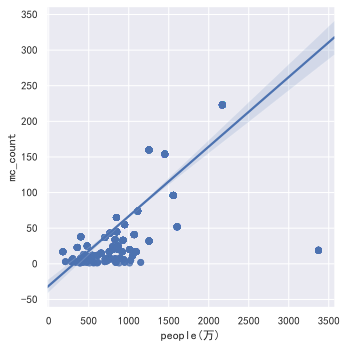

In [16]:
# 正常显示中文
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)

sns.set(style='darkgrid',color_codes=True,font=myfont.get_name())
sns.lmplot(x='people(万)',y='mc_count',data=df4)

# 保存
plt.savefig('人口店铺数.png')

## 城市名-店铺数 + GDP（并列柱状图）

In [17]:
df5 = pd.merge(df3,GDP_people_df)
df5.head()

,city,mc_count,GDP(亿元),people(万)
0,北京市,223,30320,2171
1,深圳市,160,24691,1253
2,广州市,154,23000,1450
3,天津市,96,18809,1557
4,武汉市,74,14847,1112


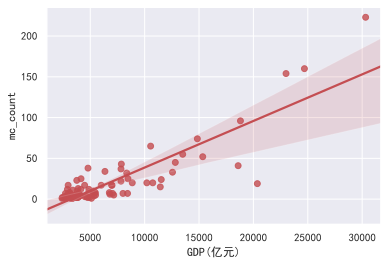

In [18]:
sns.set(style='darkgrid',color_codes=True,font=myfont.get_name())
sns.regplot(x='GDP(亿元)',y='mc_count',data=df5,color='r')
plt.savefig('GDP店铺数.png')